Necessary imports:

In [949]:
# TODO: cut down to only necessary imports
import matplotlib.pylab as plt
from pylab import *
import numpy as np
import glob
import skimage as ski
import skimage.morphology as mp
from skimage.morphology import disk
from skimage import io, filters
from skimage.filters import rank
from skimage.filters.edges import convolve
from skimage.util import img_as_float, img_as_ubyte
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from IPython.display import display
from ipywidgets import *
from ipywidgets import interact, interactive, fixed
from matplotlib_inline.backend_inline import flush_figures

Global data:

In [950]:
columns = 6
rows = 4 

# dimensions of images
images_dim = []

Implemented functions:

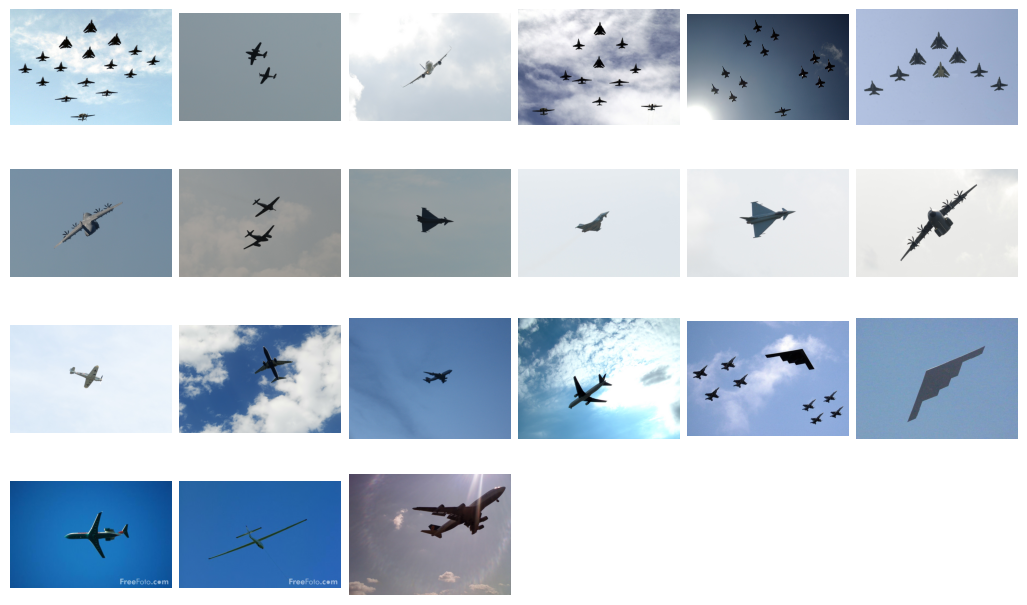

In [951]:
# read every image from file_path
def read_data(file_path):
    images = []
    for filename in glob.glob(file_path + '/*.jpg'):
        image = io.imread(filename)
        images.append(img_as_float(image)) # img_as_float converts from 0-255 to 0-1

        h, w = image.shape[:2]
        images_dim.append([h, w]) 
    return images

# most common value, working for grayscaled images
# probably not that useful
def get_commmon_value(image):
    image = (image * 255).astype(np.uint8) # convert to 0-255 for bincount()
    flattened_image = image.flatten() # flatten to 1 dimensional array
    counts = np.bincount(flattened_image) # count every value
    most_common_value = np.argmax(counts) # get back to 0-1
    return most_common_value / 255

# show collection of images
def show_images(data):
    fig = plt.figure(figsize=(13, 8))

    for i in range(len(data)):
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(data[i], cmap='gray') # delete gray if not showing gray images
        plt.axis('off')
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()

# convolution with changing to grayscale
def convolve_images(image, k_array):
    k_array = k_array / k_array[k_array > 0].sum()

    image = convolve(image, k_array)
    
    return image

def contrast(image, perc):
    MIN = np.percentile(image, perc)
    MAX = np.percentile(image, 100-perc)
    norm = (image - MIN) / (MAX - MIN)
    norm[norm[:,:] > 1] = 1
    norm[norm[:,:] < 0] = 0

    return norm

# image binarization
def thresh(image, value):
    binary = (image > value)
    binary = np.uint8(binary)
    
    return binary

# turn blue values from rgb above a given value white
# leave the rest unchanged
def thresh_blue(image, value):
    binary = image[:,:,2] > value
    image = image * (1 - binary[:, :, np.newaxis]) * 1
    image = np.where(image == 0, 1, image)

    return image

plane_images = read_data("data")
show_images(plane_images)

# Main function:

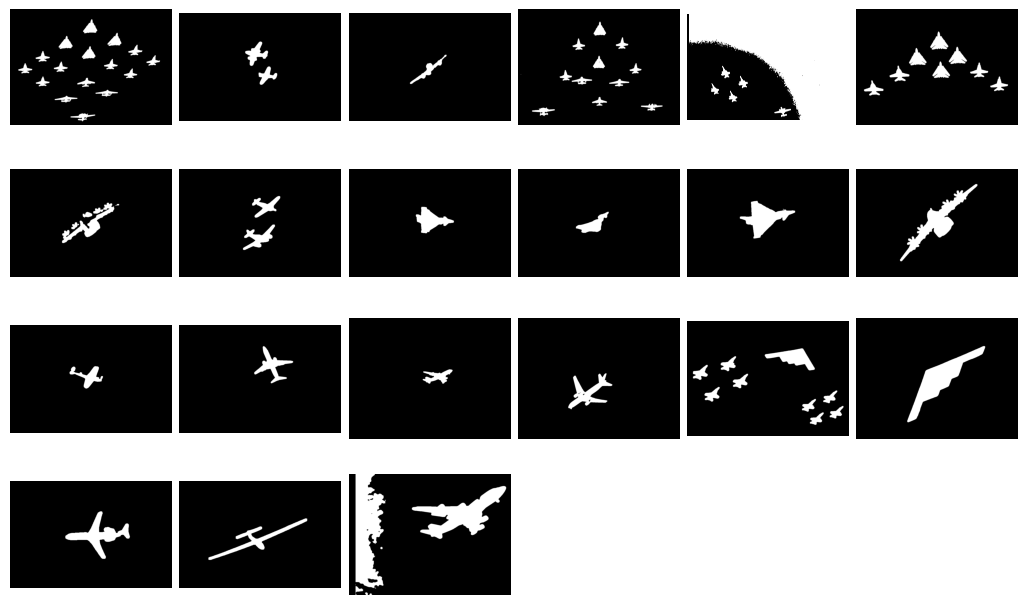

In [ ]:
fixed_planes = []

for image in plane_images:

    new_image = thresh_blue(image, 0.48)

    new_image = rgb2gray(new_image)

    new_image = convolve_images(new_image, ones([11,11]))

    # new_image = thresh(new_image, 0.1)
    # new_image = 1 - new_image

    # mask = new_image > get_commmon_value(new_image) + 0.02
    # new_image = new_image * (1 - mask) + (new_image ** 4) * mask

    # new_image = new_image ** 0.4
    # new_image = contrast(new_image, 0.3)
    
    new_image[:, 0:37] = 1
    new_image = 1 - new_image
    new_image = thresh(new_image, 0.1)

    fixed_planes.append(new_image)

show_images(fixed_planes)

In [953]:
# for i, image in enumerate(fixed_planes):
#     mask = image > get_commmon_value(image) + 0.02

#     fixed_planes[i] = image * (1 - mask) + (image ** 4) * mask
    
# show_images(fixed_planes)

In [954]:
# for i, image in enumerate(fixed_planes):
#     mask = image < get_commmon_value(image)

#     fixed_planes[i] = image * (1 - mask) + (image ** 0.2) * mask